<a href="https://colab.research.google.com/github/RomaricKanyamibwa/ForestCoverTypePrediction/blob/master/ForestCoverTypePrediction_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
col_names=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
covtype=pd.read_csv(data_url,delimiter=",",header =None,names=col_names)

In [100]:
#Distribution des differents Cover Type
tab=covtype["Cover_Type"].value_counts(ascending=True)
print(tab)

4      2747
5      9493
6     17367
7     20510
3     35754
1    211840
2    283301
Name: Cover_Type, dtype: int64


# Construction des données equilibre

In [101]:
import random


covtype_balanced=covtype[covtype['Cover_Type']==4]
#tab=covtype_balanced["Cover_Type"].value_counts(ascending=True)
#print(tab)
frames = [covtype_balanced]

for i in range(1,8):
  if i!=4:
    frames.append(covtype[covtype['Cover_Type']==i].sample(n=int(len(covtype_balanced)*(1+random.uniform(0, 0.75)))))

covtype_balanced=pd.concat(frames)
covtype_balanced=covtype_balanced.sample(frac=1).reset_index(drop=True)#melange des données
tab=covtype_balanced["Cover_Type"].value_counts(ascending=True)
print(tab)
#print(len(covtype_balanced))
#covtype_balanced.head(5)

4    2747
1    3182
3    3800
7    3998
5    4165
6    4308
2    4732
Name: Cover_Type, dtype: int64


# Analyse de données 
verifiecation des proprietes vu dans le dataset globale

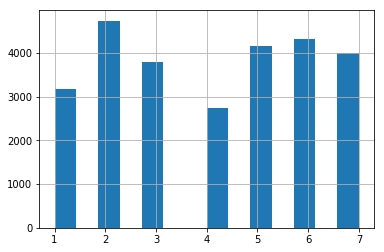

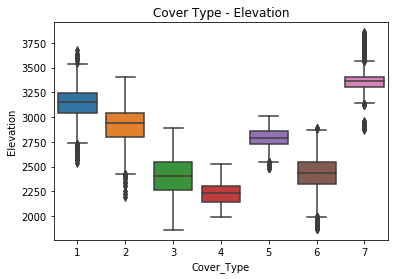

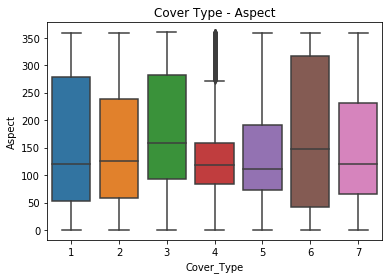

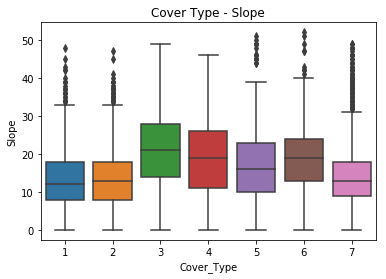

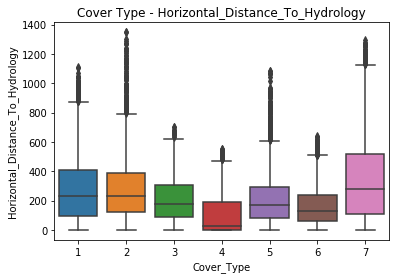

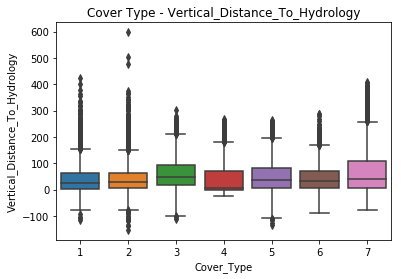

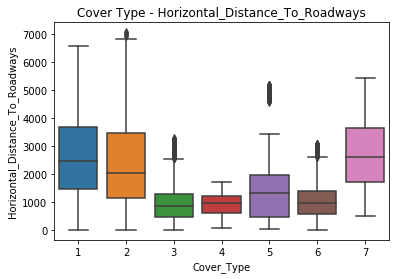

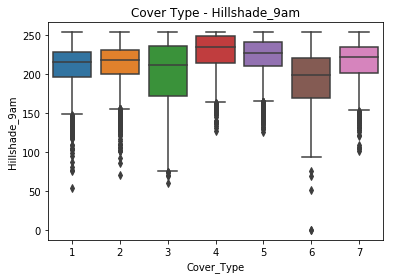

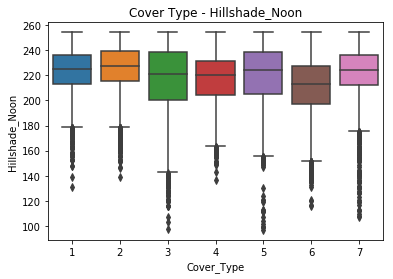

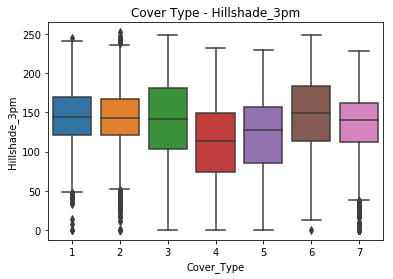

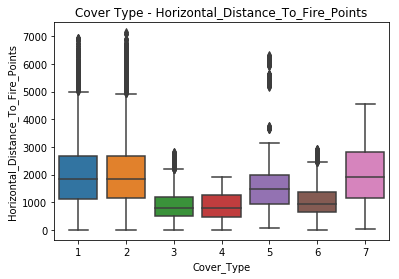

In [102]:
#Histograme 
covtype_balanced['Cover_Type'].hist(bins=2*7);
plt.show()
#sns.boxplot(x="Cover_Type",y="Elevation", data=covtype);
cols = covtype_balanced.columns
size = 10#len(cols) - 1 # on enleve cover_type
# l'axe de x  represente les 7 classes classes
x = cols[-1]
y = cols[0:size]

for i in range(0, size):
    ax=sns.boxplot(data=covtype_balanced, x=x, y=y[i])
    title="Cover Type - "+col_names[i]
    ax.set_title(title)
    #ax = sns.swarmplot(data=covtype, x=x, y=y[i])
    plt.show()

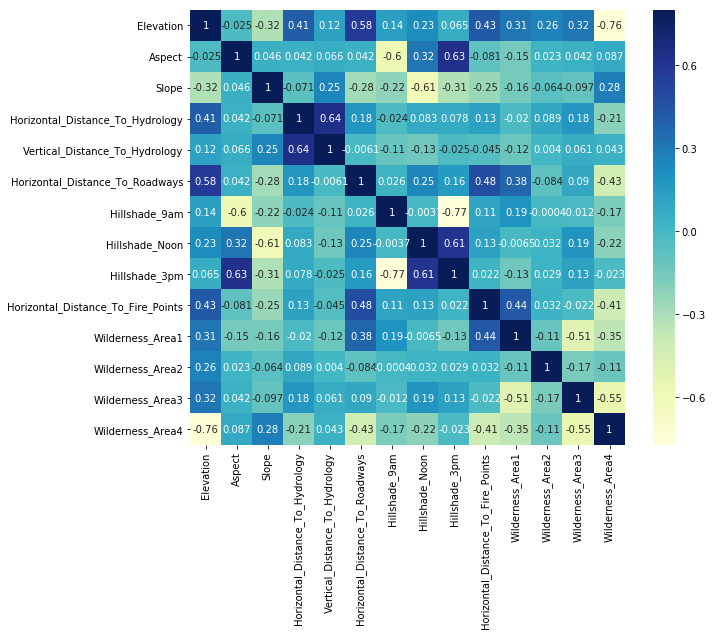

In [103]:
#Matrice de correlation ,on va  étudier l'intensité de la liaison qui peut exister entre les differents variables

size = 14
corrmat = covtype_balanced.iloc[:,:size].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,cmap="YlGnBu");

# **Construction des Modeles Predictives**

In [0]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [0]:
#function generique pour un classifieur et sa performance:
def classification_model(model, data, predictors, outcome):
  #entrainement du model:
  model.fit(data[predictors],data[outcome])
  
  #predictions sur le training set:
  predictions = model.predict(data[predictors])
  
  #affichage de l'accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits = 5, shuffle = True, random_state = 2)
  error = []
  for train, test in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

# Logit

In [108]:
outcome_var = 'Cover_Type'
#we increase max_iter to assure convergence
model = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter = 1000)
predictor_var = ['Elevation']
scaler = StandardScaler()
covtype_balanced.head(5)
end=10#only categorical variables
#we scale to speed up convergence
covtype_balanced[col_names[:end]]=scaler.fit_transform(covtype_balanced[col_names[:end]])
covtype_balanced.head(5)
classification_model(model, covtype_balanced,col_names[:10],outcome_var)

Accuracy : 64.117%
Cross-Validation Score : 63.924%
